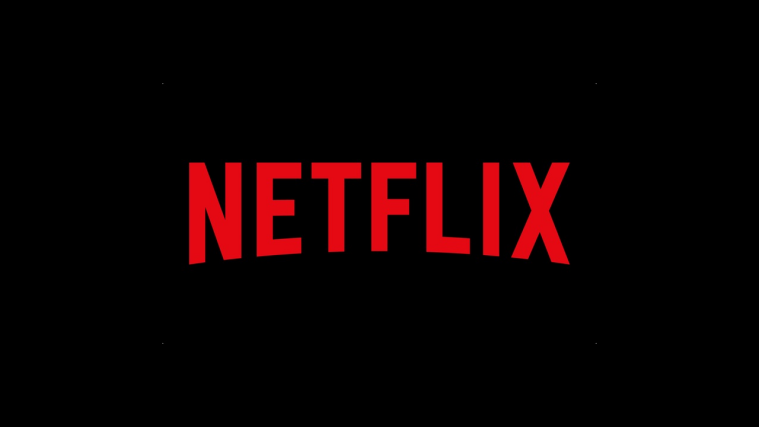

Netflix, Inc. is an American technology and media services provider and production company headquartered in Los Gatos, California. Netlix was founded in 1997 by Reed Hastings and Marc Randolph in Scots Valley, California. The company's primary business is its subscription-based streaming service, which offers online streaming of a library of films and television series, including those produced in-house.

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc

# 1. Defining Problem Statement

## Business Problem


Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

**Column names in dataset and what they mean: -**

1. Show_id: Unique ID for every Movie / Tv Show
2. Type: Identifier - A Movie or TV Show
3. Title: Title of the Movie / Tv Show
4. Director: Director of the Movie
5. Cast: Actors involved in the movie/show
6. Country: Country where the movie/show was produced
7. Date_added: Date it was added on Netflix
8. Release_year: Actual Release year of the movie/show
9. Rating: TV Rating of the movie/show
10. Duration: Total Duration - in minutes or number of seasons
11. Listed_in: Genre
12. Description: The summary description

## Loading the dataset and reading the csv file as pandas dataframe

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv(r"/kaggle/input/netflix/Netflix.csv")

## Analysing basic metrics

In [282]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Shape of dataframe

In [283]:
df.shape

(8807, 12)

### Datatype and non null count of different columns

---



In [284]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [286]:
df.ndim

2

# Ratings analysis

In [287]:
df["rating"].nunique()

17

In [288]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [289]:
df["rating"].isna().sum()

4

In [290]:
df.loc[df["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [291]:
df["rating"].value_counts().head()

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64

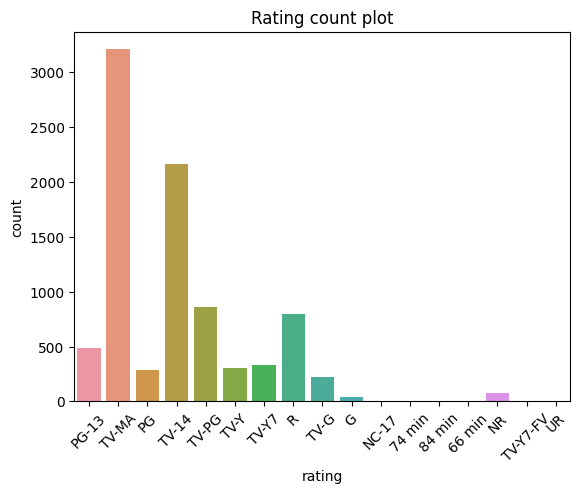

In [292]:
sns.countplot(df, x ="rating")
plt.xticks(rotation = 45)
plt.title("Rating count plot")
plt.show()

## **Observation**

We have 17 different rating categories.Movies with category TV-MA has the highest count while those with category 66 min has lowest.

2 movies and 2 TV shows in the dataset have not been given any rating.



Top 3 rating categories in terms of count :-

1. TV-MA -  3207
2. TV-14 -  2160
3. TV-PG -  863

Bottom 3 rating categories in terms of count: -

1. 66 min - 1
2. 74 min - 1
3. 84 min - 1




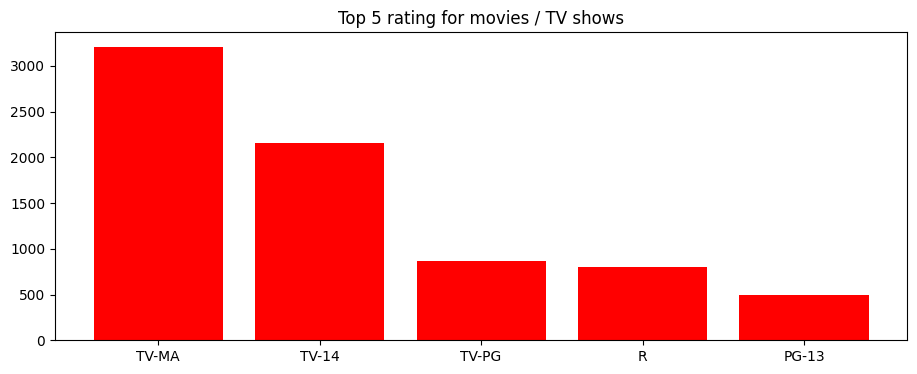

In [293]:
plt.figure(figsize=(11,4))
country_counts = df["rating"].value_counts().head()
x_bar = country_counts.index
y_bar = country_counts
plt.bar(x_bar, y_bar, color= "r")
plt.title("Top 5 rating for movies / TV shows")
plt.show()



# Type, Director, Country

In [294]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

**We have 2 types of data available.**

1. Movies  - (Count- 6131)
2. TV show - (Count - 2676)

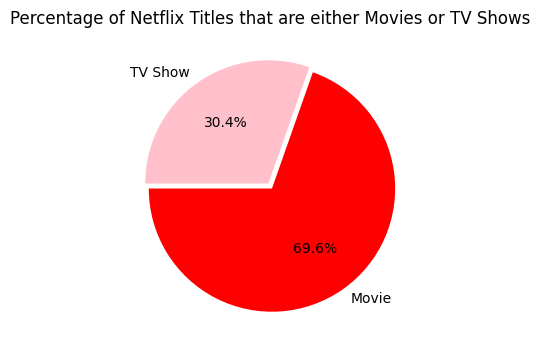

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(11,4))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
g=plt.pie(df.type.value_counts(),explode=(0.025,0.025),
labels=df.type.value_counts().index, colors=['red','pink'],autopct='%1.1f%%',startangle=180)
plt.show()

## **Director**

In [296]:
df["director"].nunique()

4528

In [297]:
df[["director"]].value_counts()

director                             
Rajiv Chilaka                            19
Raúl Campos, Jan Suter                   18
Suhas Kadav                              16
Marcus Raboy                             16
Jay Karas                                14
                                         ..
Jos Humphrey                              1
Jose Gomez                                1
Jose Javier Reyes                         1
Joseduardo Giordano, Sergio Goyri Jr.     1
Khaled Youssef                            1
Name: count, Length: 4528, dtype: int64

In [298]:
df[["director"]].isna().sum()

director    2634
dtype: int64

## **Country**

In [299]:
df["country"].value_counts()

country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

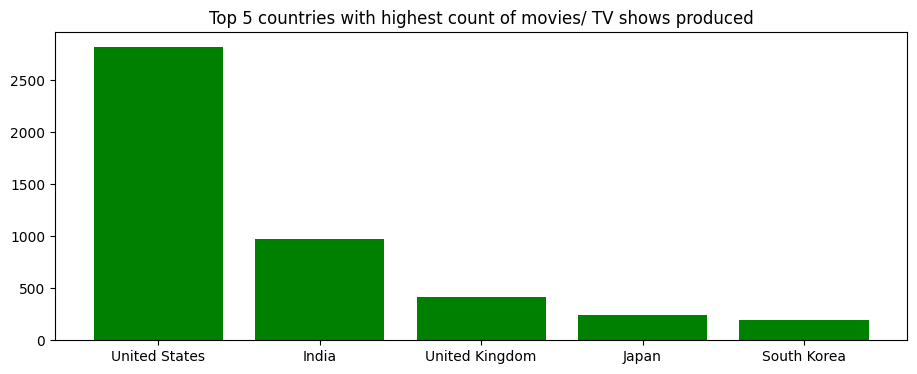

In [300]:
plt.figure(figsize=(11,4))
country_counts = df['country'].value_counts().head(5)
x_bar = country_counts.index
y_bar = country_counts
plt.bar(x_bar, y_bar, color= "g")
plt.title("Top 5 countries with highest count of movies/ TV shows produced")
plt.show()



# Release year

**Obeservation**

Number of movies released per year has seen a steady growth over the years. Netflix has shown tendency to add more movies which are released recently with the year 2018 having the highest count. Very less number of movies pre year 2000 have been added.

In [301]:
df["release_year"].value_counts().head()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
Name: count, dtype: int64

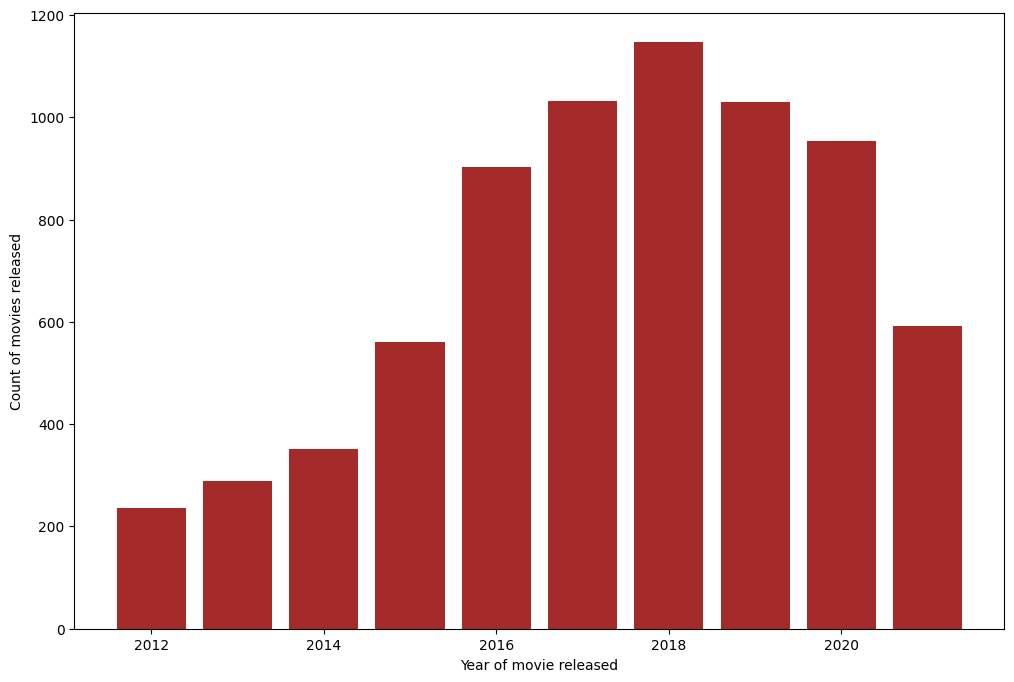

In [302]:
release_year_counts = df['release_year'].value_counts().head(10)
x_bar = release_year_counts.index
y_bar = release_year_counts

plt.figure(figsize=(12, 8))    # Rotation is (8,8)
plt.bar(x_bar, y_bar, color = "brown")
plt.xlabel("Year of movie released")
plt.ylabel("Count of movies released")
plt.show()

<Axes: xlabel='release_year', ylabel='Count'>

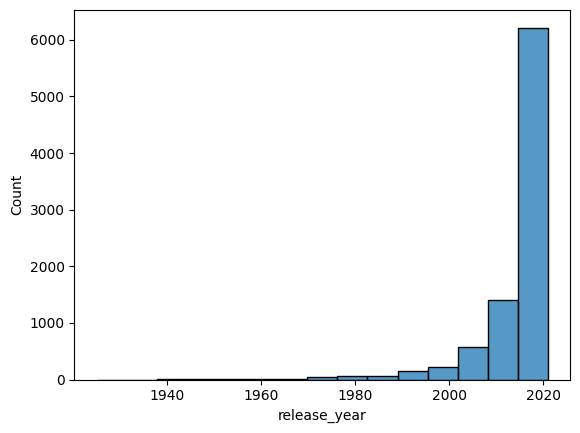

In [303]:
sns.histplot(df['release_year'], bins=15)


# Date added

**Observation**

With increasing boom of OTT viewership, content addition on Netflix platform has seen a significant rise post year 2015 with the peak being touched in year 2019 when 2026 number of (TV shows + movies) were added.

In [304]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [306]:
df.head(1443)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
1438,s1439,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,"January 6, 2021",2020,TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...
1439,s1440,TV Show,History of Swear Words,NaN,Nicolas Cage,United States,"January 5, 2021",2021,TV-MA,1 Season,"Docuseries, TV Comedies","Nicolas Cage hosts this proudly profane, funny..."
1440,s1441,TV Show,Nailed It! Mexico,NaN,"Omar Chaparro, Anna Ruiz","Mexico, United States","January 5, 2021",2021,TV-PG,3 Seasons,"International TV Shows, Reality TV, Spanish-La...","The fun, fondant and hilarious cake fails head..."
1441,s1442,Movie,Hello Brother,Sohail Khan,"Salman Khan, Arbaaz Khan, Rani Mukerji, Johny ...",India,"January 4, 2021",1999,TV-14,126 min,"Action & Adventure, Comedies, International Mo...",After receiving a heart transplant from a murd...


In [307]:
# Remove leading and trailing spaces
df['date_added'] = df['date_added'].str.strip()

from datetime import datetime

df['date_added'] = pd.to_datetime(df['date_added'])


df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [308]:
df["date_added"].dt.year.value_counts()

date_added
2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: count, dtype: int64

In [309]:
date = df['date_added'].dt.year.value_counts().head(10).reset_index()
date

,date_added,count
0,2019.0,2016
1,2020.0,1879
2,2018.0,1649
3,2021.0,1498
4,2017.0,1188
5,2016.0,429
6,2015.0,82
7,2014.0,24
8,2011.0,13
9,2013.0,11


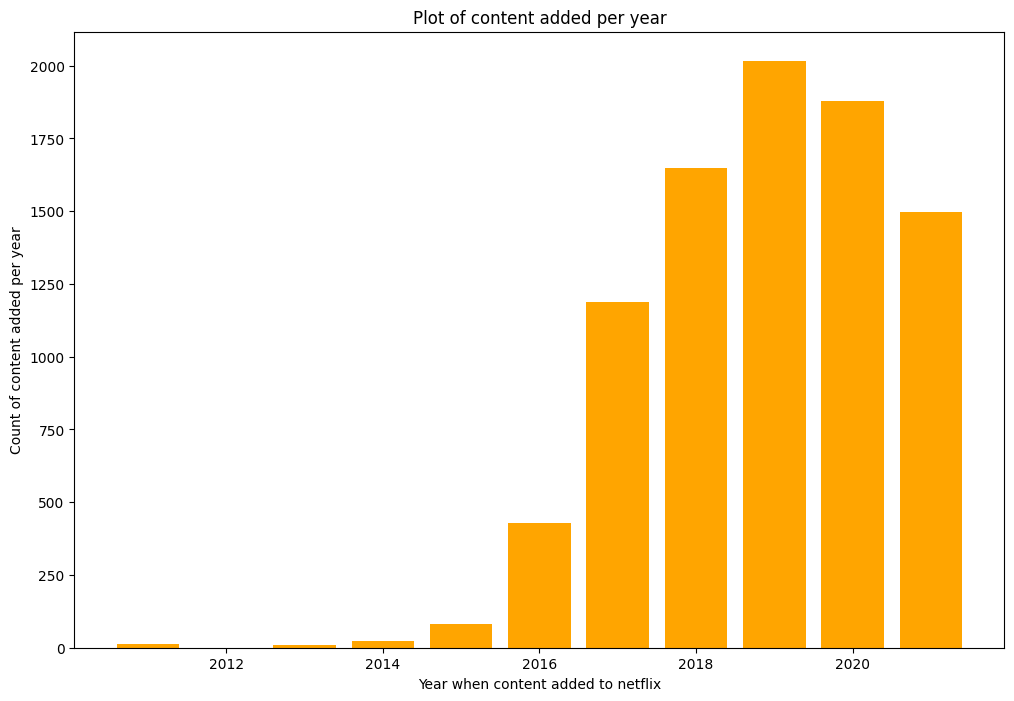

In [310]:
date_added_counts = df['date_added'].dt.year.value_counts().head(10)
x_bar = date_added_counts.index
y_bar = date_added_counts

plt.figure(figsize=(12, 8))    # Rotation is (8,8)
plt.bar(x_bar, y_bar, color = "orange", width = 0.8)
plt.xlabel("Year when content added to netflix")
plt.ylabel("Count of content added per year")
plt.title("Plot of content added per year")
plt.show()

<Axes: xlabel='date_added', ylabel='Count'>

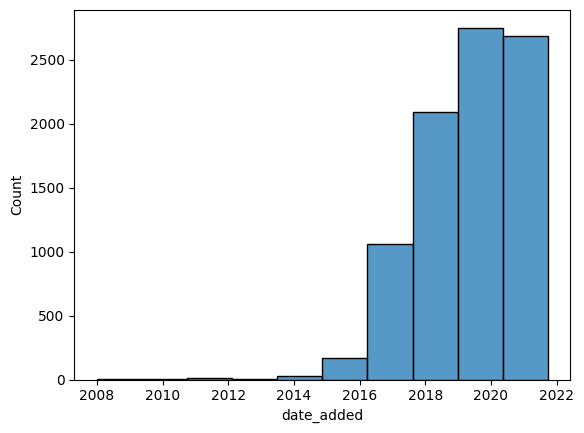

In [311]:
sns.histplot(df['date_added'], bins=10)


# KDE plots for release year and years added




<Axes: xlabel='date_added', ylabel='Density'>

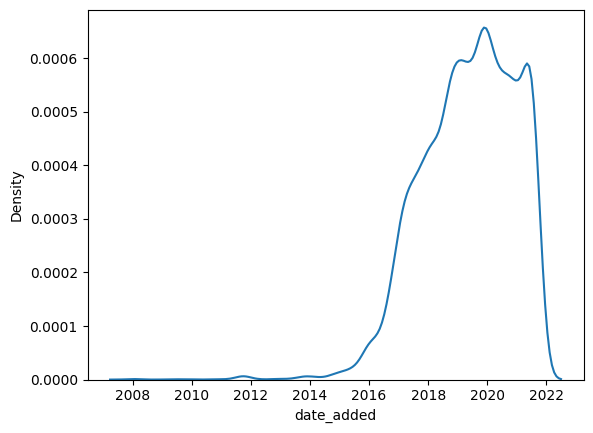

In [312]:
sns.kdeplot(df['date_added'])


<Axes: xlabel='release_year', ylabel='Density'>

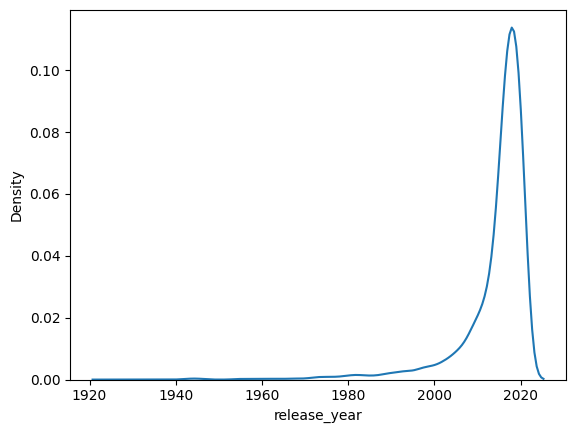

In [313]:
sns.kdeplot(df['release_year'])


# **Preprocessing the data**

1. Missing Value Detection
2. Data Profiling
3. Cleaning

Columns with missing value: -

In [314]:
print('Columns with missing value:')
print(df.isna().any())

Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration         True
listed_in       False
description     False
dtype: bool


Total number of missing values in dataset

In [315]:
df.isna().sum().sum()

4307

Count of missing values per column:

In [316]:
df.isna().sum(axis = 0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## **Observations**


Netflix dataset has total 4307 missing values.

**Below columns have the missing values.i.e Data is not available.**



1.   cast       ---      825
2.   director   ---      2634
3.   country    ---      831
4.   date_added ---      10
5.   rating     ---      4
6.   duration   ---      3



# Imputation

Let's start with columns which have very less missing values.


*   rating
*   duration
*   date_added

## Rating

In [317]:
df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Since there are only 4 missing values for rating we are filling them with most common netflix ratings TV- MA

In [318]:
df["rating"].fillna("TV-14", inplace =True)

df["rating"].isna().sum()

0

## Duration

In [319]:
df["duration"].nunique()

220

In [320]:
df["duration"].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

In [321]:
df.loc[df["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [322]:
df["duration"].fillna("90 min", inplace =True)

df["duration"].isna().sum()

0

As we see duration columns has 3 missing values and all of them are movies. Hence we are filling the missing values in duration column with most common duration count for movies. (90 min)

## Date added

In [323]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Converting information in date_added column to general date format.("YY-MM-DD")

In [324]:
from datetime import datetime

df['date_added'] = pd.to_datetime(df['date_added'])

df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [325]:
df["date_added"].isna().sum()

10

In [326]:
df.loc[df["date_added"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [327]:
df["date_added"].mean()

Timestamp('2019-05-17 05:59:08.436967168')

In [328]:
df["date_added"].dt.year.value_counts()

date_added
2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: count, dtype: int64

In [329]:
df["date_added"].fillna("2019-05-17", inplace = True)

df["date_added"].isna().sum()

0

Highest number of Movies / TV Shows have been added in year 2019. Hence we are filling the missing values in date_added columns with mean of data_added column (2019-05-17)

In [330]:
df["date_added"].dt.year.value_counts()

date_added
2019    2026
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

# Unnesting data

For columns with high number of missing values it is found that there a multiple values in a single cell. For eg. some cells have multiple directors for a movie or TV show. Similarly a movie of TV show is listed in different categories simultaneously. Here unnesting the data will help us not only streamline the data but will also help in visualisation and recommendation.


1. cast
2. director
3. country
4. listed_in
5. description



## Description

In [331]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [332]:
a = df.drop("description", axis = 1)
a

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies"


We are removing the description column from data since it does not add any value to our recomendation. Now the df shape is 8807 rows and 11 columns.

## **Unnesting of listed_in column**

In [333]:
b = a.set_index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration']).apply(lambda x: x.str.split(',').explode()).reset_index()

b

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
19318,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies
19319,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Comedies
19320,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,Dramas
19321,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,International Movies


## **Unnesting of country column**

In [334]:
c = b.set_index(['show_id', 'type', 'title', 'director', 'cast', 'date_added',
       'release_year', 'rating', 'duration',"listed_in"]).apply(lambda x: x.str.split(',').explode()).reset_index()

c

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,2021-09-25,2020,PG-13,90 min,Documentaries,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,South Africa
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23759,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min,Children & Family Movies,United States
23760,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",2020-01-11,2006,PG,88 min,Comedies,United States
23761,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111 min,Dramas,India
23762,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",2019-03-02,2015,TV-14,111 min,International Movies,India


## **Unnesting of director column**

In [335]:
netflix_df = c.set_index(['show_id', 'type', 'title', 'cast',"country", 'date_added',
       'release_year', 'rating', 'duration',"listed_in"]).apply(lambda x: x.str.split(',').explode()).reset_index()

netflix_df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,director
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,NaN
2,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,NaN
3,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,NaN
4,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,Julien Leclercq
...,...,...,...,...,...,...,...,...,...,...,...
25895,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,Peter Hewitt
25896,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Comedies,Peter Hewitt
25897,s8807,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,Dramas,Mozez Singh
25898,s8807,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,International Movies,Mozez Singh


# Unnested dataframe

In [336]:
netflix_df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,director
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,NaN
2,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,NaN
3,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,NaN
4,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,Julien Leclercq
...,...,...,...,...,...,...,...,...,...,...,...
25895,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,Peter Hewitt
25896,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Comedies,Peter Hewitt
25897,s8807,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,Dramas,Mozez Singh
25898,s8807,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,International Movies,Mozez Singh


In [337]:
netflix_df.shape

(25900, 11)

In [338]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
cast            2149
country         1824
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
director        6567
dtype: int64

In [339]:
netflix_df["country"].nunique()

197

In [340]:
netflix_df["country"].value_counts()

country
United States     6350
India             2901
United Kingdom    1486
 United States    1115
Japan              659
                  ... 
 Nicaragua           1
 Sudan               1
Somalia              1
 Bahamas             1
 Kazakhstan          1
Name: count, Length: 197, dtype: int64

In [341]:
netflix_df["listed_in"].value_counts()

listed_in
 International Movies        3689
Dramas                       2313
Comedies                     1494
Action & Adventure           1305
Documentaries                1292
                             ... 
Spanish-Language TV Shows       3
Romantic Movies                 3
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: count, Length: 73, dtype: int64

In [342]:
netflix_df["country"].isna().sum()


1824

In [343]:
 x =  netflix_df.loc[netflix_df["country"].isna()]

 x


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,director
4,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,Julien Leclercq
5,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,International TV Shows,Julien Leclercq
6,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,TV Action & Adventure,Julien Leclercq
7,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,Docuseries,NaN
8,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,Reality TV,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25830,s8784,TV Show,Yoko,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,2018-06-23,2016,TV-Y,1 Season,Kids' TV,NaN
25833,s8786,TV Show,YOM,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,2018-06-07,2016,TV-Y7,1 Season,Kids' TV,NaN
25890,s8804,TV Show,Zombie Dumb,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,Kids' TV,NaN
25891,s8804,TV Show,Zombie Dumb,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,Korean TV Shows,NaN


In [344]:
netflix_df[["type", "country"]].value_counts().head()

type     country       
Movie    United States     4769
         India             2685
TV Show  United States     1581
Movie     United States     897
         United Kingdom     811
Name: count, dtype: int64

In [345]:
netflix_df["rating"].value_counts().head(8)

rating
TV-MA    9520
TV-14    6153
R        2668
TV-PG    2399
PG-13    1730
PG       1124
TV-Y7     734
TV-Y      577
Name: count, dtype: int64

# Filling missing values in country column through various combinations of type and rating

In [346]:
netflix_df["country"].isna().sum()

1824

## Using the combination (type = TV show and rating = TV MA)

For the above combination we see there are 378 missing values. Since TV shows with highest TV MA rating are produced in United states we are filling the missing values with United States.

In [347]:
netflix_df["country"].isna().sum()

1824

In [348]:
netflix_df.loc[(netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-MA")]["country"].value_counts()

country
United States     702
United Kingdom    301
South Korea       170
Japan             155
Spain             123
                 ... 
Croatia             2
 West Germany       2
New Zealand         2
 South Korea        2
 Hungary            1
Name: count, Length: 78, dtype: int64

In [349]:
netflix_df.loc[(netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-MA")]["country"].isna().sum()


378

In [350]:
condition = (netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-MA")
netflix_df.loc[condition & netflix_df['country'].isnull(), 'country'] = 'United States'


In [351]:
netflix_df["country"].isna().sum()

1446

In [352]:
netflix_df.loc[(netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-MA")]["country"].isna().sum()



0

## Using the combination (type = TV show and rating = TV 14)

For the above combination we see there are 269 missing values. Since TV shows with highest TV MA rating are produced in United states we are filling the missing values with United States.

In [353]:
netflix_df["country"].isna().sum()

1446

In [354]:
netflix_df.loc[(netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-14")]["country"].value_counts()

country
United States     409
South Korea       238
Japan             168
United Kingdom    119
Taiwan            112
                 ... 
 Syria              2
 Egypt              2
New Zealand         2
Czech Republic      1
 West Germany       1
Name: count, Length: 61, dtype: int64

In [355]:
netflix_df.loc[(netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-14")]["country"].isna().sum()


269

In [356]:
conditio = (netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-14")
netflix_df.loc[conditio & netflix_df['country'].isnull(), 'country'] = 'United States'


In [357]:
netflix_df["country"].isna().sum()

1177

In [358]:
netflix_df.loc[(netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-14")]["country"].isna().sum()


0

## Using the combination (type = movie and rating = TV MA )

For the above combination we see there are 306 missing values. Since movies with highest TV MA rating are produced in United states we are filling the missing values with United States.

In [359]:
netflix_df["country"].isna().sum()

1177

In [360]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "TV-MA")]["country"].value_counts()

country
United States     1221
India              688
Spain              287
United Kingdom     241
France             219
                  ... 
Greece               2
 New Zealand         2
 Greece              1
 Senegal             1
 Australia           1
Name: count, Length: 145, dtype: int64

In [361]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "TV-MA")]["country"].isna().sum()


306

In [362]:
conditi = (netflix_df["type"] == "Movie") & (netflix_df['rating'] == "TV-MA")
netflix_df.loc[conditi & netflix_df['country'].isnull(), 'country'] = 'United States'


In [363]:
netflix_df["country"].isna().sum()

871

In [364]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "TV-MA")]["country"].isna().sum()


0

## Using the combination (type = movie and rating = TV-14 )

For the above combination we see there are 303 missing values. Since movies with highest TV 14 rating are produced in India we are filling the missing values with India.

In [365]:
netflix_df["country"].isna().sum()

871

In [366]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "TV-14")]["country"].value_counts()

country
India            1547
United States     430
Egypt             167
Indonesia         117
Nigeria           108
                 ... 
Austria             2
 Taiwan             2
 Hungary            2
 South Korea        2
New Zealand         1
Name: count, Length: 113, dtype: int64

In [367]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "TV-14")]["country"].isna().sum()


303

In [368]:
condit = (netflix_df["type"] == "Movie") & (netflix_df['rating'] == "TV-14")
netflix_df.loc[condit & netflix_df['country'].isnull(), 'country'] = 'India'


In [369]:
netflix_df["country"].isna().sum()

568

In [370]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "TV-14")]["country"].isna().sum()


0

## Using the  (type = Movie and rating = R combination)

For the above combination we see there are 18 missing values. Since highest R rated movies are produced in United states we are filling the missing values with United States.

In [371]:
netflix_df["country"].isna().sum()

568

In [372]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "R")]["country"].value_counts()

country
United States      1094
 United States      272
United Kingdom      201
 United Kingdom     111
 France             103
                   ... 
 Ireland              1
Hungary               1
 Colombia             1
 Nicaragua            1
 Sudan                1
Name: count, Length: 86, dtype: int64

In [373]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "R")]["country"].isna().sum()

18

In [374]:
condi = (netflix_df["type"] == "Movie") & (netflix_df['rating'] == "R")
netflix_df.loc[condi & netflix_df['country'].isnull(), 'country'] = 'United States'


In [375]:
netflix_df["country"].isna().sum()

550

In [376]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "R")]["country"].isna().sum()

0

## Using the combination (type = TV Show and rating = TV PG )

For the above combination we see there are 108 missing values. Since highest TV PG rated movies are produced in United states we are filling the missing values with United States.

In [377]:
netflix_df["country"].isna().sum()

550

In [378]:
netflix_df.loc[(netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-PG")]["country"].value_counts().head()

country
United States     197
United Kingdom    150
South Korea        45
Japan              44
Australia          28
Name: count, dtype: int64

In [379]:
netflix_df.loc[(netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-PG")]["country"].isna().sum()


108

In [380]:
cond = (netflix_df["type"] == "TV Show") & (netflix_df['rating'] == "TV-PG")
netflix_df.loc[cond & netflix_df['country'].isnull(), 'country'] = 'United States'


In [381]:
netflix_df["country"].isna().sum()

442

In [382]:
netflix_df.loc[(netflix_df["type"] == 'TV Show') & (netflix_df['rating'] == "TV-PG")]["country"].isna().sum()


0

## Using the combination  (type = Movie and rating = TV PG )

For the above combination we see there are 89 missing values. Since highest TV-PG rated movies are produced in India we are filling the missing values with India.

In [383]:
netflix_df["country"].isna().sum()

442

In [384]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "TV-PG")]["country"].value_counts()

country
India              372
United States      306
Japan               72
United Kingdom      58
Indonesia           57
                  ... 
 Czech Republic      2
Austria              2
Sweden               2
 Panama              2
 Bulgaria            1
Name: count, Length: 81, dtype: int64

In [385]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "TV-PG")]["country"].isna().sum()

89

In [386]:
con = (netflix_df["type"] == "Movie") & (netflix_df['rating'] == "TV-PG")
netflix_df.loc[con & netflix_df['country'].isnull(), 'country'] = 'India'


In [387]:
netflix_df["country"].isna().sum()

353

In [388]:
netflix_df.loc[(netflix_df["type"] == 'Movie') & (netflix_df['rating'] == "TV-PG")]["country"].isna().sum()

0

## Using the combination (type = TV-Show & Movie and rating = TV-Y7 )

For the above combination we see there are 159 missing values. Since highest count of TV-Y7 rated movies and TV shows are produced in United states we are filling the missing values with United States.

In [389]:
netflix_df["country"].isna().sum()

353

In [390]:
netflix_df.loc[(netflix_df['rating'] == "TV-Y7")]["country"].isna().sum()

159

In [391]:
netflix_df.loc[(netflix_df['rating'] == "TV-Y7")]["country"].value_counts().head()

country
United States     218
Japan              39
 United States     35
Canada             30
India              28
Name: count, dtype: int64

In [392]:
co = (netflix_df['rating'] == "TV-Y7")
netflix_df.loc[co & netflix_df['country'].isnull(), 'country'] = 'United States'


In [393]:
netflix_df["country"].isna().sum()

194

In [394]:
netflix_df.loc[(netflix_df['rating'] == "TV-Y7")]["country"].isna().sum()

0

##  Remaining missing values

We have covered all the possible types and rating combinations with highest count. For the remaining missing values since United States has the highest count for movies and TV shows in our data we are replacing the missing values with name United State for country.

In [395]:
netflix_df["country"].isna().sum()

194

In [396]:
netflix_df.loc[(netflix_df["type"] == 'Movie')]["country"].isna().sum()

125

In [397]:
netflix_df.loc[(netflix_df["type"] == 'TV Show')]["country"].isna().sum()

69

In [398]:
netflix_df.loc[(netflix_df["type"] == 'TV Show')]["country"].value_counts().head(3)

country
United States     2405
United Kingdom     675
South Korea        483
Name: count, dtype: int64

In [399]:
netflix_df.loc[(netflix_df["type"] == 'Movie')]["country"].value_counts().head(3)

country
United States     5183
India             3077
 United States     897
Name: count, dtype: int64

In [400]:
netflix_df["country"].fillna("United States", inplace = True)


In [401]:
netflix_df["country"].isna().sum()

0

# Filling missing values in director column.


Out of total data of 25900 rows. The highest count of director for a TV show/  movie is 46. There are total 5120 directors available in our data. Since large number of different directors are available missing values in directors will not be much helpful for providing recommendations. Hence replacing missing values with string No Director.

In [402]:
netflix_df["director"].value_counts().head()

director
Youssef Chahine        46
Cathy Garcia-Molina    37
Martin Scorsese        36
Lars von Trier         33
Steven Spielberg       32
Name: count, dtype: int64

In [403]:
netflix_df["director"].nunique()

5120

In [404]:
netflix_df["director"].isna().sum()

6567

In [405]:
netflix_df["director"].fillna("No director", inplace = True)


In [406]:
netflix_df["director"].isna().sum()

0

# Filling missing values in cast column.


We have not unnested the data in cast column as it does not provide much value for recommending. Here we are replacing missing values with string No Cast.

In [407]:
netflix_df["cast"].fillna("No cast", inplace = True)


In [408]:
netflix_df["cast"].isna().sum()

0

# Final dataframe

In [409]:
netflix_df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,director
0,s1,Movie,Dick Johnson Is Dead,No cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,No director
2,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,No director
3,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,No director
4,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,Julien Leclercq
...,...,...,...,...,...,...,...,...,...,...,...
25895,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Children & Family Movies,Peter Hewitt
25896,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,Comedies,Peter Hewitt
25897,s8807,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,Dramas,Mozez Singh
25898,s8807,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,International Movies,Mozez Singh


In [410]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25900 entries, 0 to 25899
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       25900 non-null  object        
 1   type          25900 non-null  object        
 2   title         25900 non-null  object        
 3   cast          25900 non-null  object        
 4   country       25900 non-null  object        
 5   date_added    25900 non-null  datetime64[ns]
 6   release_year  25900 non-null  int64         
 7   rating        25900 non-null  object        
 8   duration      25900 non-null  object        
 9   listed_in     25900 non-null  object        
 10  director      25900 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 2.2+ MB


# Analysis

## Netflix Content By Type
Analysis entire Netflix dataset consisting of both movies and shows.
Let’s compare the total number of movies and shows in this dataset
to know which one is the majority.

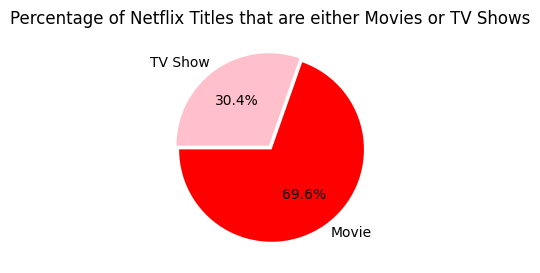

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,3))
plt.title("Percentage of Netflix Titles that are either Movies or TV Shows")
g=plt.pie(df.type.value_counts(),explode=(0.025,0.025),
labels=df.type.value_counts().index, colors=['red','pink'],autopct='%1.1f%%',
startangle=180)
plt.show()

# Countries

Below we have highlighted countries with maximum content in Netflix on map.

In [412]:
df["country"].nunique()

748

In [438]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

filtered_countries = netflix_df.set_index('title').country.str.split(', ',
expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
iplot([go.Choropleth(
locationmode='country names',
locations=filtered_countries,
z=filtered_countries.value_counts()
)])


## Content available in different countries

In [414]:
netflix_df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,director
0,s1,Movie,Dick Johnson Is Dead,No cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,Kirsten Johnson
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,No director
2,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,No director
3,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,No director
4,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,Julien Leclercq


In [415]:
netflix_df["country"] = netflix_df["country"].replace([" United States", " United Kingdom", " France", " Canada", " Germany"], ["United States","United Kingdom", "France", "Canada", "Gremany"])

In [416]:
movies_count = netflix_df.loc[netflix_df["type"] == "Movie"]["country"].value_counts().head(10)
movies_count

country
United States     6205
India             3077
United Kingdom    1155
France             840
Canada             732
Spain              352
Egypt              261
Japan              259
Gremany            248
Indonesia          244
Name: count, dtype: int64

In [417]:
TV_Shows_count = netflix_df.loc[netflix_df["type"] == "TV Show"]["country"].value_counts().head(10)
TV_Shows_count

country
United States     2692
United Kingdom     725
South Korea        483
Japan              400
Canada             248
Taiwan             230
India              216
France             202
Spain              153
Mexico             138
Name: count, dtype: int64

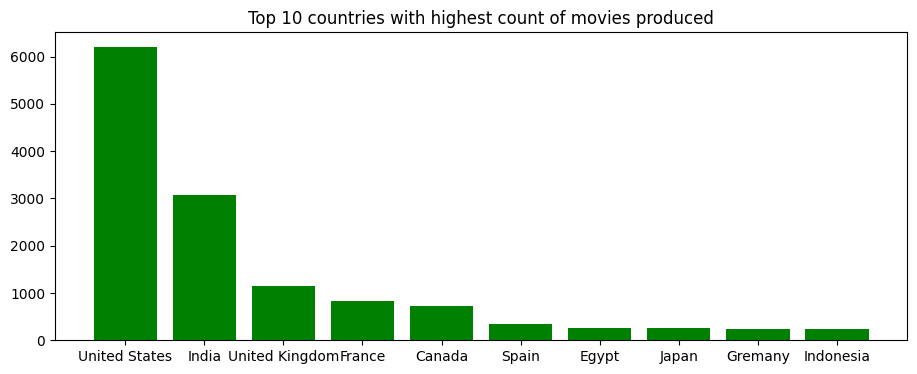

In [418]:
plt.figure(figsize=(11,4))
#country_counts = df['country'].value_counts().head(5)
movies_count = netflix_df.loc[netflix_df["type"] == "Movie"]["country"].value_counts().head(10)
TV_Shows_count = netflix_df.loc[netflix_df["type"] == "TV Show"]["country"].value_counts().head(10)

x_bar = movies_count.index
y_bar = movies_count
plt.bar(x_bar, y_bar, color= "g")
plt.title("Top 10 countries with highest count of movies produced")
plt.show()


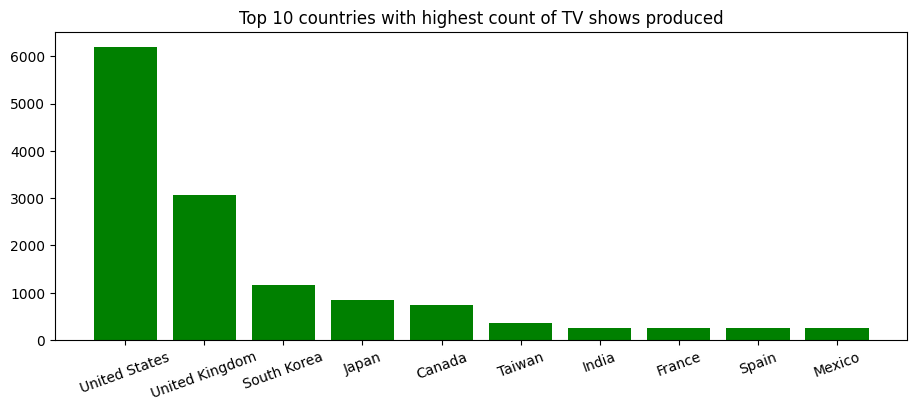

In [419]:
plt.figure(figsize=(11,4))
TV_Shows_count = netflix_df.loc[netflix_df["type"] == "TV Show"]["country"].value_counts().head(10)

x_bar = TV_Shows_count.index
y_bar = movies_count
plt.bar(x_bar, y_bar, color= "g")
plt.title("Top 10 countries with highest count of TV shows produced")
plt.xticks(rotation = 20)
plt.show()


# Time analysis


## Time difference

For the entire dataset we can say on an average a movie is avaialble on netflix 4.6 yrs after it was released. HOwever looking at our earlier analysis of release year and date added where we saw that Netflix started adding more content on its platform after year 2015. Here we see that movies are avaialble on Netflix platform for streaming in under 10 months from their release year.

In [420]:
df["time_difference"] = df["date_added"].dt.year - df["release_year"]

In [421]:
df["time_difference"].mean()

4.691836039514023

In [422]:
s = netflix_df.loc[netflix_df["release_year"] >= 2015]

In [423]:
s["time_difference"] = s["date_added"].dt.year - s["release_year"]

In [424]:
s["time_difference"].mean()

0.9773459126603017

In [425]:
s["time_difference"].describe()

count    17701.000000
mean         0.977346
std          1.286916
min         -3.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: time_difference, dtype: float64

Text(0.5, 1.0, 'Movies added time')

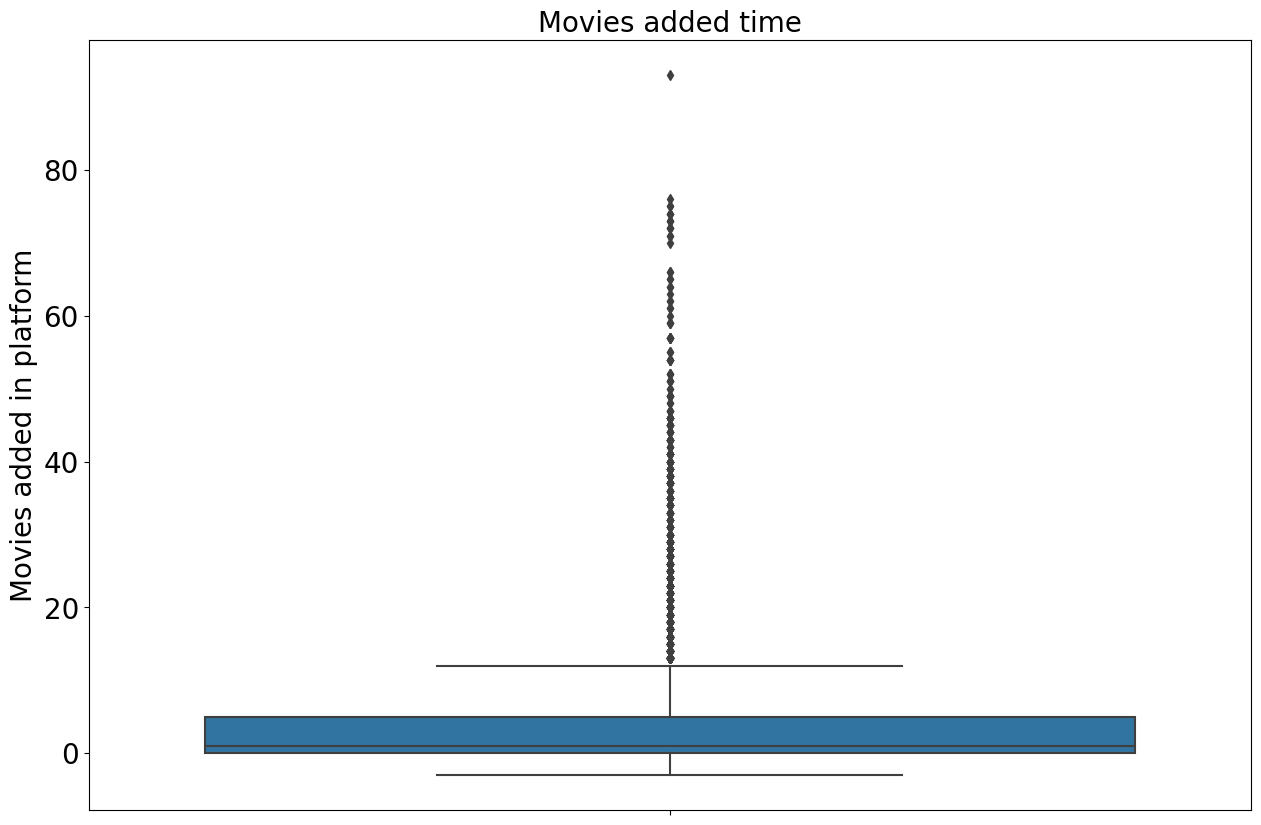

In [426]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=df['time_difference'])
plt.yticks(fontsize=20)
plt.ylabel('Movies added in platform', fontsize=20)
plt.title('Movies added time', fontsize=20)


The distrbution show that moajority of month are seeing  2000 + movies added.

1. Less than 25 percent of movies are added in (0-1) year of its release.
2. Less than 50 percent of movies are added in (1-4) year of its release.
3. 75 percent of movies are added after 4 years of its release.

There are lot of outlliers since our data contact movies that were released in 1959 while Netflix was launched in 1997 and started picking up pace as a OTT platform in 2015.

## Month wise distribution

In [427]:
netflix_df["date_added"].dt.month.value_counts()

date_added
7     2517
12    2368
9     2285
4     2279
10    2266
1     2256
8     2181
6     2113
3     2098
11    1970
5     1870
2     1697
Name: count, dtype: int64

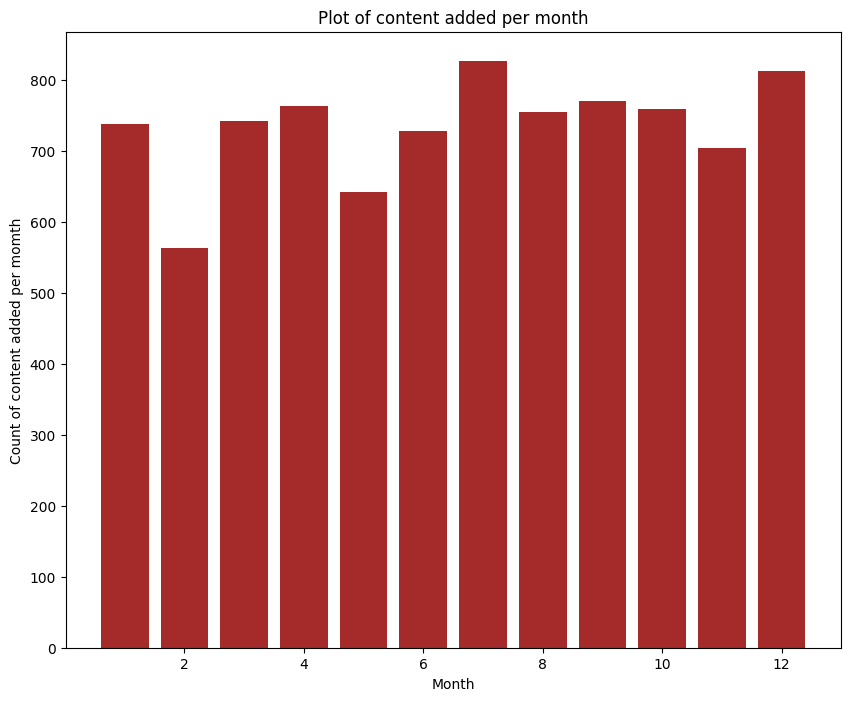

In [428]:
date_added_counts = df['date_added'].dt.month.value_counts()
x_bar = date_added_counts.index
y_bar = date_added_counts

plt.figure(figsize=(10, 8))    # Rotation is (8,8)
plt.bar(x_bar, y_bar, color = "brown", width = 0.8)
plt.xlabel("Month")
plt.ylabel("Count of content added per momth")
plt.title("Plot of content added per month")
plt.show()

We can say comparatively more content is added in second half of the year. Below KDE plot show the same.

<Axes: xlabel='date_added', ylabel='Density'>

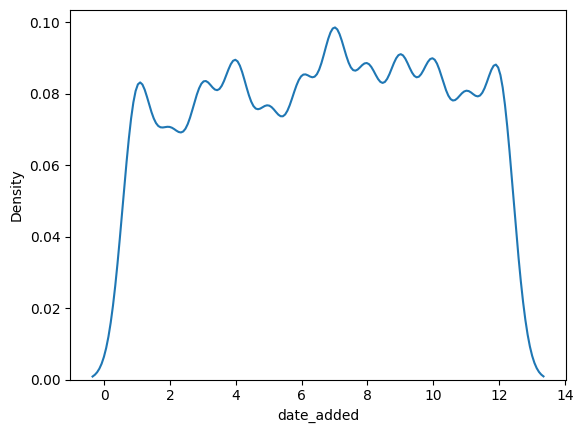

In [429]:
sns.kdeplot(netflix_df['date_added'].dt.month)

## Monthly addition of movies

Text(0.5, 1.0, 'Movies addition plot per month')

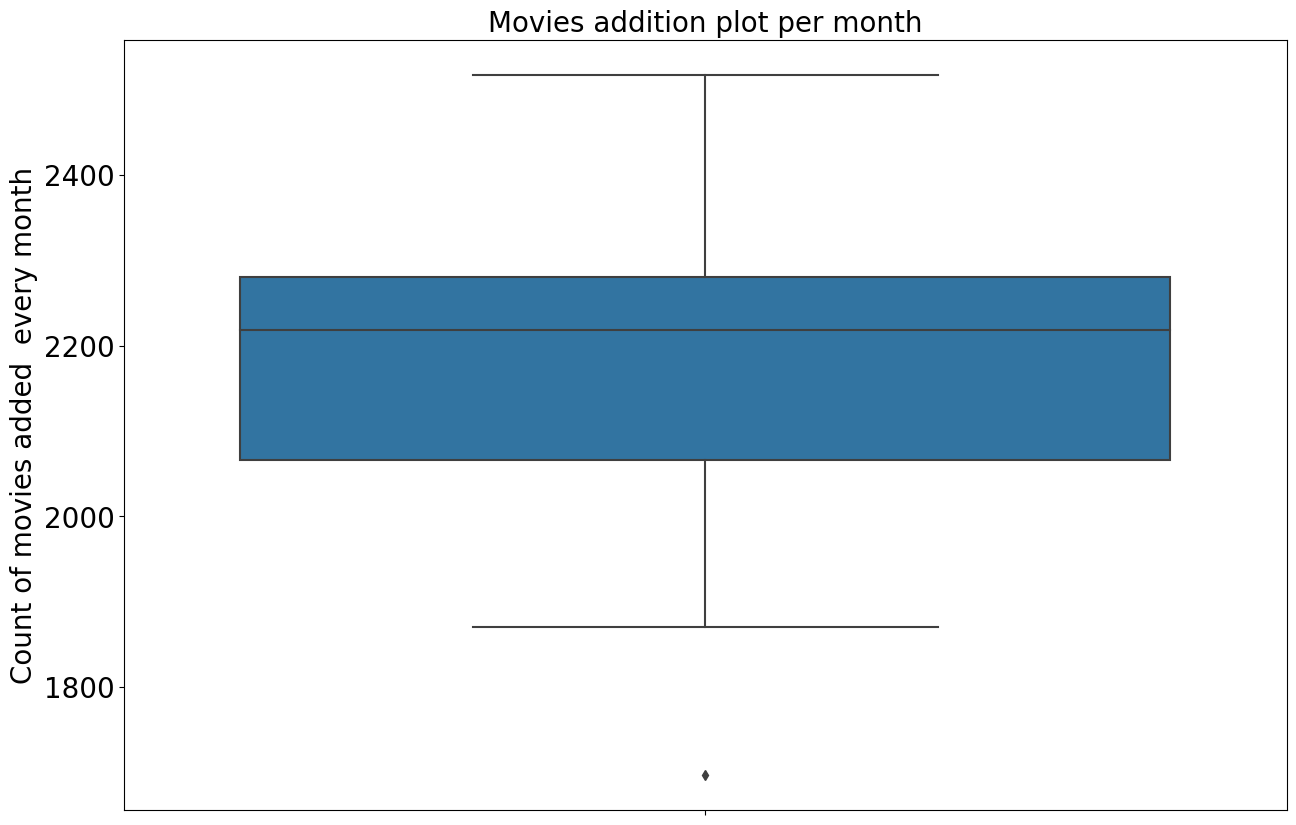

In [430]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=netflix_df["date_added"].dt.month.value_counts())
plt.yticks(fontsize=20)
plt.ylabel('Count of movies added  every month', fontsize=20)
plt.title('Movies addition plot per month', fontsize=20)


The distrbution show that moajority of month are seeing  2000 + movies added.

1. 25 percent of months add more than 1900 movies per month.
2. 50 percent of month add more than 2000 movies per month.
3. 75 percent of mont add more thant 2300 movies per month.

# Top directors on Netlflix

<Figure size 1000x600 with 0 Axes>

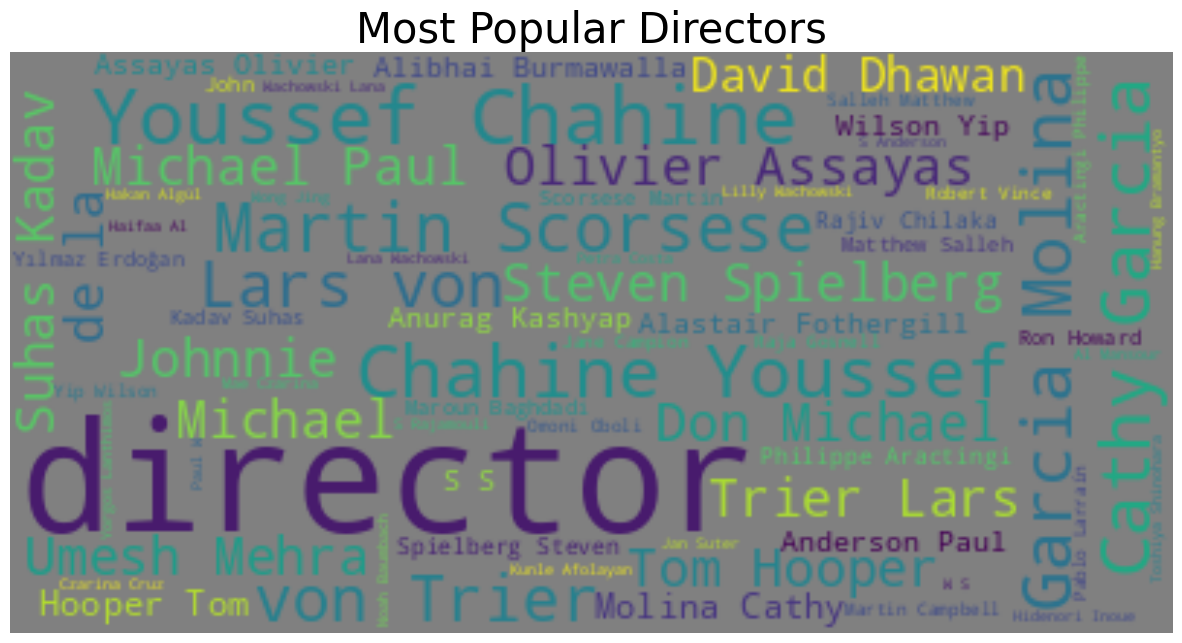

In [431]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in netflix_df.director)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="gray").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Directors',fontsize = 30)
plt.axis("off")
plt.show()

# Top Genres

## Top Genres on Netflix

In [432]:
netflix_df["listed_in"] = netflix_df["listed_in"].replace([" International Movies"," Dramas", " International TV Shows", " Comedies"], ["International Movies","Dramas", "International TV Shows", "Comedies"])

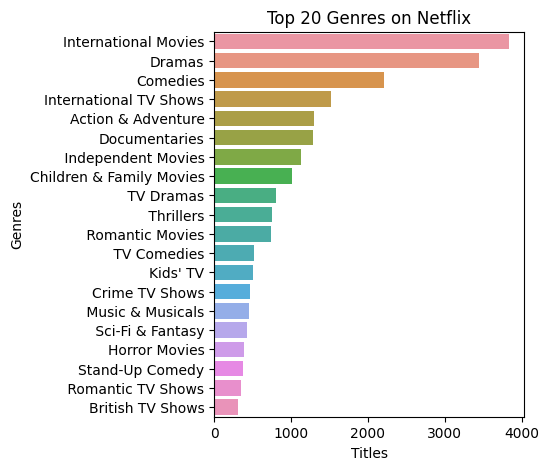

In [433]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ',
expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(4,5))
g = sns.countplot(y = filtered_genres,
order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

Our all time list tells us top 3 genres watched by viewers on netflix: -

1. International movies.
2. Dramas
3. Comedies

## Top Genres in recent years

In [434]:
d = netflix_df.loc[netflix_df["release_year"] >= 2013]
d["listed_in"].value_counts().head(10)

listed_in
International Movies        2960
Dramas                      2506
Comedies                    1447
International TV Shows      1357
Documentaries               1194
 Independent Movies          908
 TV Dramas                   737
Children & Family Movies     731
Action & Adventure           717
 Thrillers                   603
Name: count, dtype: int64

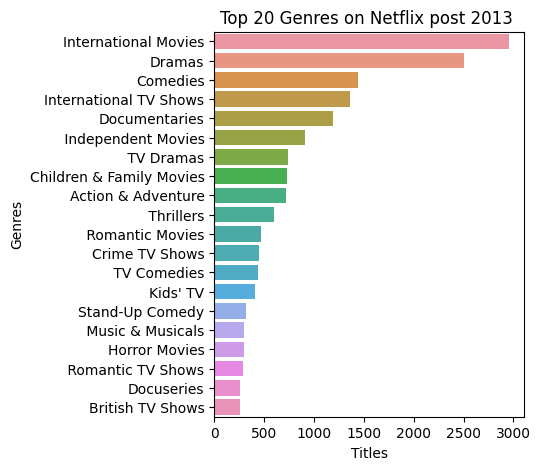

In [435]:
filtered_genres = d.set_index('title').listed_in.str.split(', ',
expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(4,5))
g = sns.countplot(y = filtered_genres,
order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix post 2013 ')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

Genres to which surged ahead : -

1. Documentaries
2. Independent movies

Genres which fell behind:

1. Action and Fantasy

# Duration distribution of movies

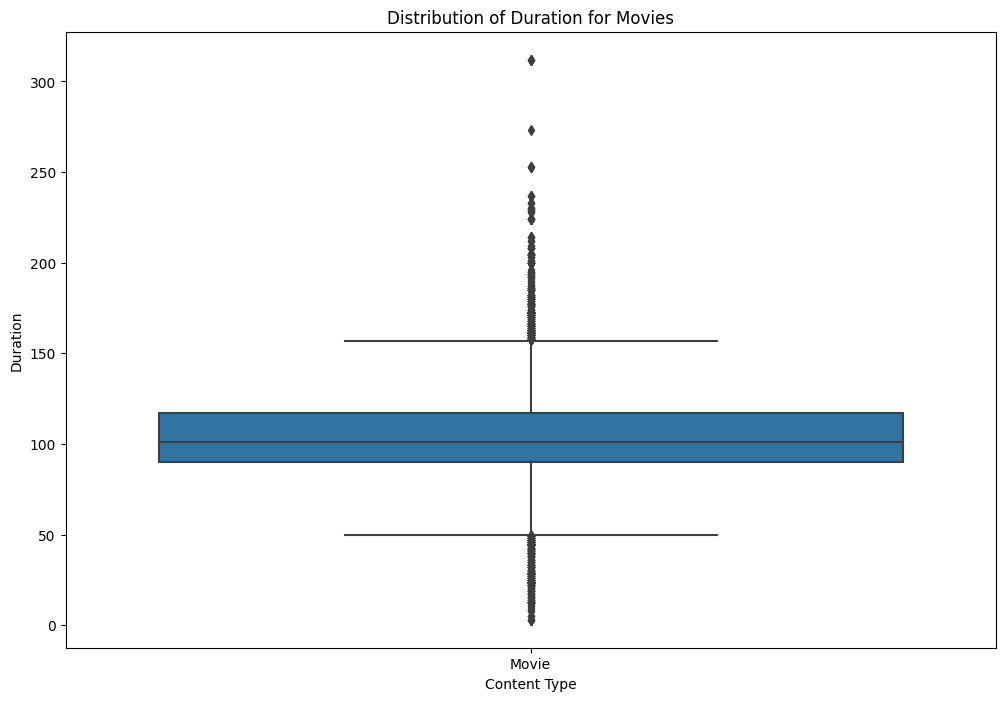

In [436]:
netflix_movies_df = netflix_df[netflix_df.type.str.contains("Movie")]
netflix_movies_df['duration'] = netflix_movies_df['duration'].str.extract('(\d+)',
expand=False).astype(int)
# Creating a boxplot for movie duration
plt.figure(figsize=(12, 8))
sns.boxplot(data=netflix_movies_df, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.show()


1. 25 percent of movies are between 50-90 min range.
2. 50 percent of movies are between 90-130 min range.
3. Less than 75 percent movies 130 -150 min range.

There are few outlies that exceeed 150 + min duration.

# Duration distribution of TV Shows



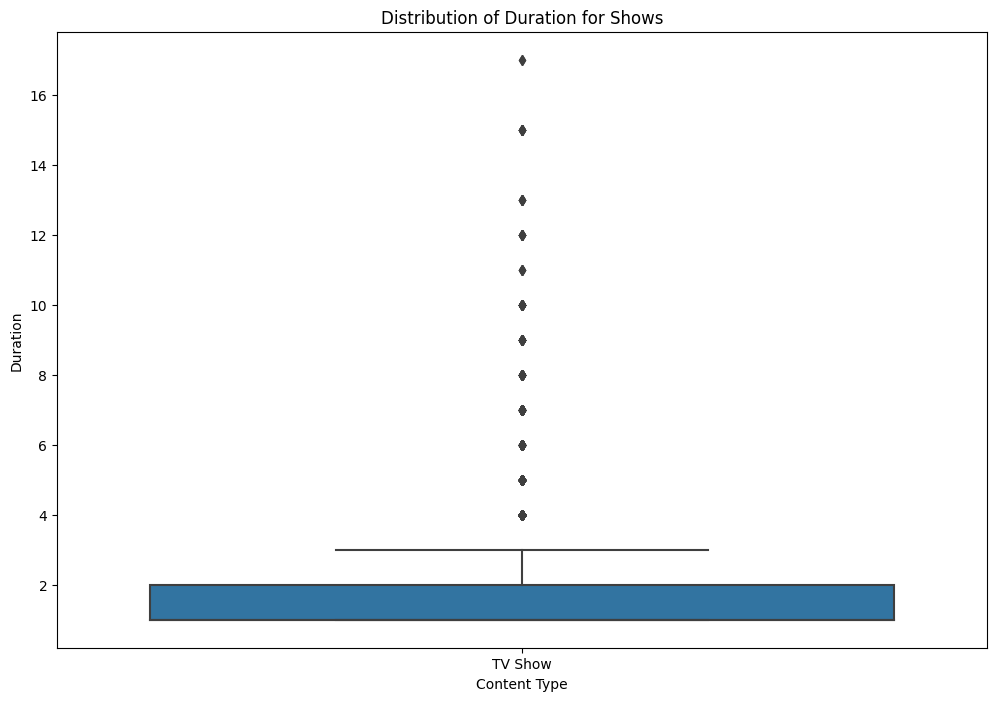

In [437]:
netflix_shows_df = netflix_df[netflix_df.type.str.contains("TV Show")]
netflix_shows_df['duration'] = netflix_shows_df['duration'].str.extract('(\d+)',
expand=False).astype(int)
# Creating a boxplot for movie duration
plt.figure(figsize=(12, 8))
sns.boxplot(data=netflix_shows_df, x='type', y='duration')
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Shows')
plt.show()

The distrbution show that moajority of month are seeing  2000 + movies added.

1. Less than 25 percent of TV shows are of 1 season.
2. 50 percent of TV shows are of 1-2 seasons.
3. 75 percent of TV shows are of 2-3 seasons.

There are few outlies that more than 4+ seasons.

# Business Insights and Recommendations

## Business Insights : -
1. Quantity: Our analysis revealed that Netflix had added more movies than TV shows,
aligning with the expectation that movies dominate their content library.
2. Content Addition: July emerged as the month when Netflix adds the most content,closely followed by December,more content addition is seen in second half of the year quite possibly as it entails a festive period in various month in various parts of the world.
3. Genre : Movies and Dramas still rule the roost. However other forms like documentaries, independent movies are generating lots of intrest among the viewers.
4. Movie Lengths: Majority of movies around 90-130 minutes are still preferred over longer duration movies.
5. TV Show Episodes: Most TV shows on Netflix have 1-2 seasons, suggesting a
preference for shorter series among viewers.
6. Rating Distribution: The distribution of ratings over the years offers insights into the evolving content landscape and audience reception. While TV MA rated TV shows and movies are are in abundance for viewers. We also see sufficient number of content for children in TV- Y7, TV- Y and G categories.
7. Increasing Relevance of OTT: As the streaming industry evolves, understanding these patterns and trends becomes increasingly essential for navigating the dynamic landscape of Netflix and its vast library.



## Recommendations :


1. Given the disparity in count of TV-shows and movies it would be recommended to partner with top directors for streaming TV-shows. Since most TV shows are nowadays released on OTT that would be a viable option to incrase viewership.
2. World wide international cinema is still the most popular category as evidenced by number of international movies contributed by 193 unique countries in our data. However it is seen Netflix has most of the movies added from recent years post 2013. We would suggest to try for streaming rights of more age old classics pre 2000's as that would make attractive signature colection for Netflix library.
3. We already have huge content for mature adults. Thus increase in content for genres like Kids, Children and Family movies, Romantic movies, TV Comedies will diversify our viewership and make Netflix a complete package to market and sell.
4. Most of the movies released in ott is in a year 2019 so we need to go on increasing this value in order to attract people by showing that
5. Since we are already targeting mature audience in second half of year with more content, it would recommend targeting Kids, families with content relevant to them in first half of the year especially during months of March, April, May as they cover major period of summer vacations for most kids.
6. Trying to buy streaming rights of upcoming movies with top directors would help us decrease the timeframe between movie release date in cinema halls and movie launch date on netflix, thus catching more viewers.
7. More focus on top 10 countries with content production will help us increase content in Netflix library.